In [1]:
# Mostre na tela a frase 'Hello World'
print (' Hello World ')

 Hello World 


In [6]:
skirt = {'size': 'M', 'price': 139.90, 'color':['black', 'red', 'blue'], 'date':'2020-01-01'}
skirt

{'size': 'M',
 'price': 139.9,
 'color': ['black', 'red', 'blue'],
 'date': '2020-01-01'}

In [17]:
skirt['color'][2]

'blue'

### Conceito de agrupamento
#. Sequencia de 03 tarefas (split, apply, combine


#. Filtro pelo tipos de valores das colunas e aplicando uma operação de agrupamento por uma coluna

In [1]:
import pandas as pd
data = pd.read_csv(r"C:\Users\99813568\repos\KC_HOUSE\kc_house_data.csv")

In [2]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# Quantos imoveis existem por numero de quartos

print (data[data['bedrooms'] == 0].shape)
print (data[data['bedrooms'] == 1].shape)
print (data[data['bedrooms'] == 2].shape)
print (data[data['bedrooms'] == 3].shape)
print (data[data['bedrooms'] == 4].shape)

(13, 21)
(199, 21)
(2760, 21)
(9824, 21)
(6882, 21)


In [4]:
# Estou agrupando pela coluna quartos
df_grouped = data[['id', 'bedrooms']].groupby ('bedrooms').shape()

#for bedrooms, frame in df_grouped:
 #   print ( 'numero de quartos: {} '.format ( bedrooms ))
  #  print ( frame.shape, end = '\n\n' )
    

AttributeError: 'DataFrameGroupBy' object has no attribute 'shape'

## Respondendo as perguntas do CEO

In [5]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
# 1. Qual o numero de imoveis por ano de construçao

data[['id' , 'yr_built']].groupby ('yr_built').count()

,id
yr_built,
1900,87
1901,29
1902,27
1903,46
1904,45
...,...
2011,130
2012,170
2013,201


In [7]:
# Qual o menor numero de quartos por ano de construçao de imoveis?

data[['bedrooms', 'yr_built']].groupby ('yr_built').min()

,bedrooms
yr_built,
1900,1
1901,2
1902,2
1903,1
1904,2
...,...
2011,1
2012,2
2013,2


In [8]:
# Qual o preço de compra mais alto por cada numero de quartos?

data[['price', 'bedrooms']].groupby ('bedrooms').max()

,price
bedrooms,
0,1295650.0
1,1247000.0
2,3278000.0
3,3800000.0
4,4489000.0
5,7062500.0
6,7700000.0
7,3200000.0
8,3300000.0


In [9]:
# Qual a soma de todos os preços de compra por num. de quartos?
# Retirando as casa decimais dos números 

pd.set_option('display.float_format', lambda x: '%.2f' % x)
data[['price' , 'bedrooms']].groupby ('bedrooms').sum()


,price
bedrooms,
0,5323550.00
1,63210934.00
2,1107788602.00
3,4580263939.00
4,4372957028.00
5,1259346326.00
6,224541613.00
7,36145017.00
8,14366000.00


In [10]:
# 5. Qual a soma de todos os preços por numero de quartos e banheiro
## Sempre quando estou filtranado duas condicionais preciso colocar o groupby sob uma lista

data[['price', 'bedrooms', 'bathrooms']].groupby(['bedrooms', 'bathrooms']).sum()

price
bedrooms bathrooms           
0        0.00      3642600.00
         0.75       265000.00
         1.00       228000.00
         1.50       288000.00
         2.50       899950.00
...                       ...
10       2.00       650000.00
         3.00       660000.00
         5.25      1148000.00
11       3.00       520000.00
33       1.75       640000.00

[144 rows x 1 columns]

In [11]:
data[['price', 'bedrooms', 'bathrooms']].groupby(['bathrooms', 'bedrooms']).sum()

price
bathrooms bedrooms           
0.00      0        3642600.00
          1         839000.00
0.50      1         255000.00
          2         382000.00
          4         312500.00
...                       ...
6.75      7         800000.00
7.50      9         450000.00
7.75      6        6885000.00
8.00      6        7700000.00
          7        2280000.00

[144 rows x 1 columns]

In [14]:
# 6. Qual o tamanho médio das salas dos imóveis por ano de construçao?

## A media do m2 vai aumentando ao longo do tempo

data[['sqft_living', 'yr_built']].groupby ('yr_built').mean()

,sqft_living
yr_built,
1900,1732.01
1901,1763.62
1902,1919.63
1903,1507.74
1904,1603.18
...,...
2011,2313.68
2012,2378.74
2013,2636.59


In [15]:
## 7. Qual o tamanho mediano das salas dos imóveis por ano de construçao?

data[['sqft_living', 'yr_built']].groupby ('yr_built').median()

,sqft_living
yr_built,
1900,1540.00
1901,1610.00
1902,1600.00
1903,1505.00
1904,1280.00
...,...
2011,2270.00
2012,2237.50
2013,2580.00


In [16]:
## 8. Qual o desvio padrão das salas dos imóveis por ano de construçao?

data[['sqft_living', 'yr_built']].groupby ('yr_built').std()

,sqft_living
yr_built,
1900,732.94
1901,668.23
1902,878.66
1903,469.72
1904,1076.87
...,...
2011,804.86
2012,771.43
2013,883.50


In [ ]:
## 9. Com é o crescimento médio de preços de compras dos imóveis, por ano, por dia e pela semana do ano?

<BarContainer object of 2 artists>

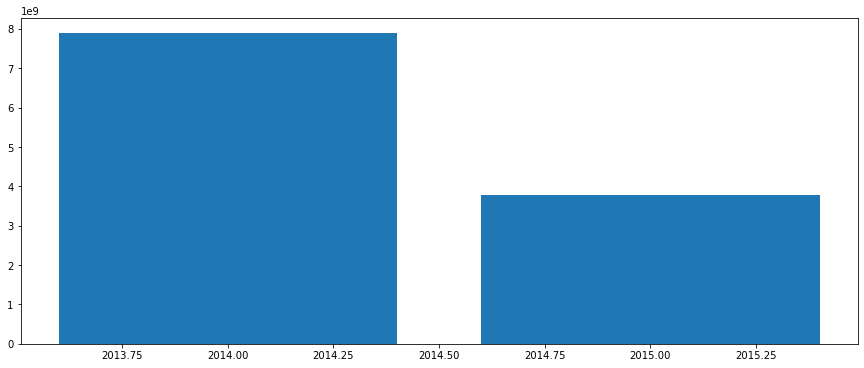

In [35]:
# First Graph
# Crescimento total de preços de compras dos imoveis por ano
# Eixo X: Anos
# Eixo Y: Soma dos preços
# Grafico de barras

from matplotlib import pyplot as plt

data['year'] = pd.to_datetime(data['date']).dt.year

by_year = data[['price', 'year']].groupby('year').sum().reset_index()

plt.figure (figsize = (15,6))
plt.bar( by_year ['year'], by_year['price'])

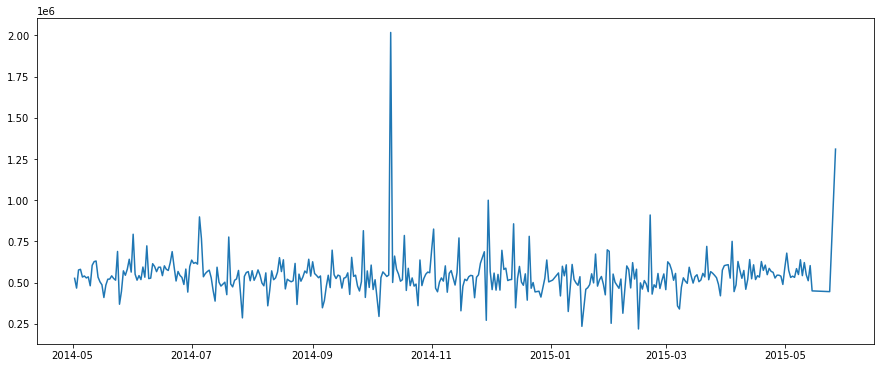

In [43]:
# Second graph
# Crescimento médio de preços de compras dos imoveis por data
# Eixo X: Anos
# Eixo Y: Media dos preços
# Grafico de barras


data['day'] = pd.to_datetime(data['date']).dt.date

by_day = data[['price', 'day']].groupby('day').mean().reset_index()

plt.figure (figsize = (15,6))
plt.plot( by_day ['day'], by_day['price'])

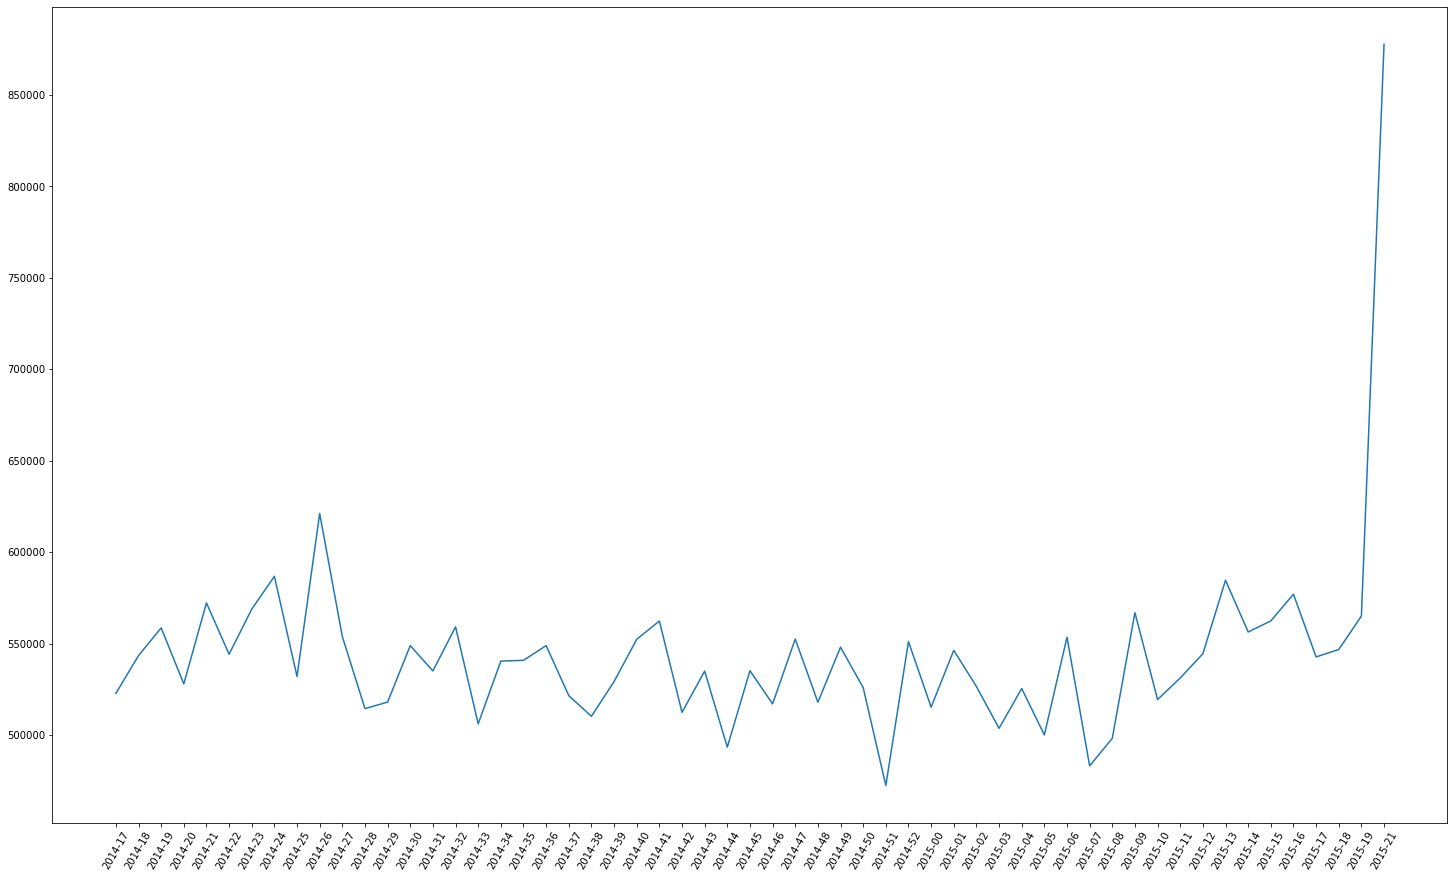

In [49]:
# Third Graph
# Crescimento médio de preços de compras dos imoveis por semana do ano
# Eixo X: Anos
# Eixo Y: Media dos preços
# Grafico de barras


data['year_week'] = pd.to_datetime(data['date']).dt.strftime ('%Y-%U')

by_week = data[['price', 'year_week']].groupby('year_week').mean().reset_index()

plt.figure (figsize = (25,15))
plt.plot( by_week ['year_week'], by_week['price'])
plt.xticks (rotation = 60);

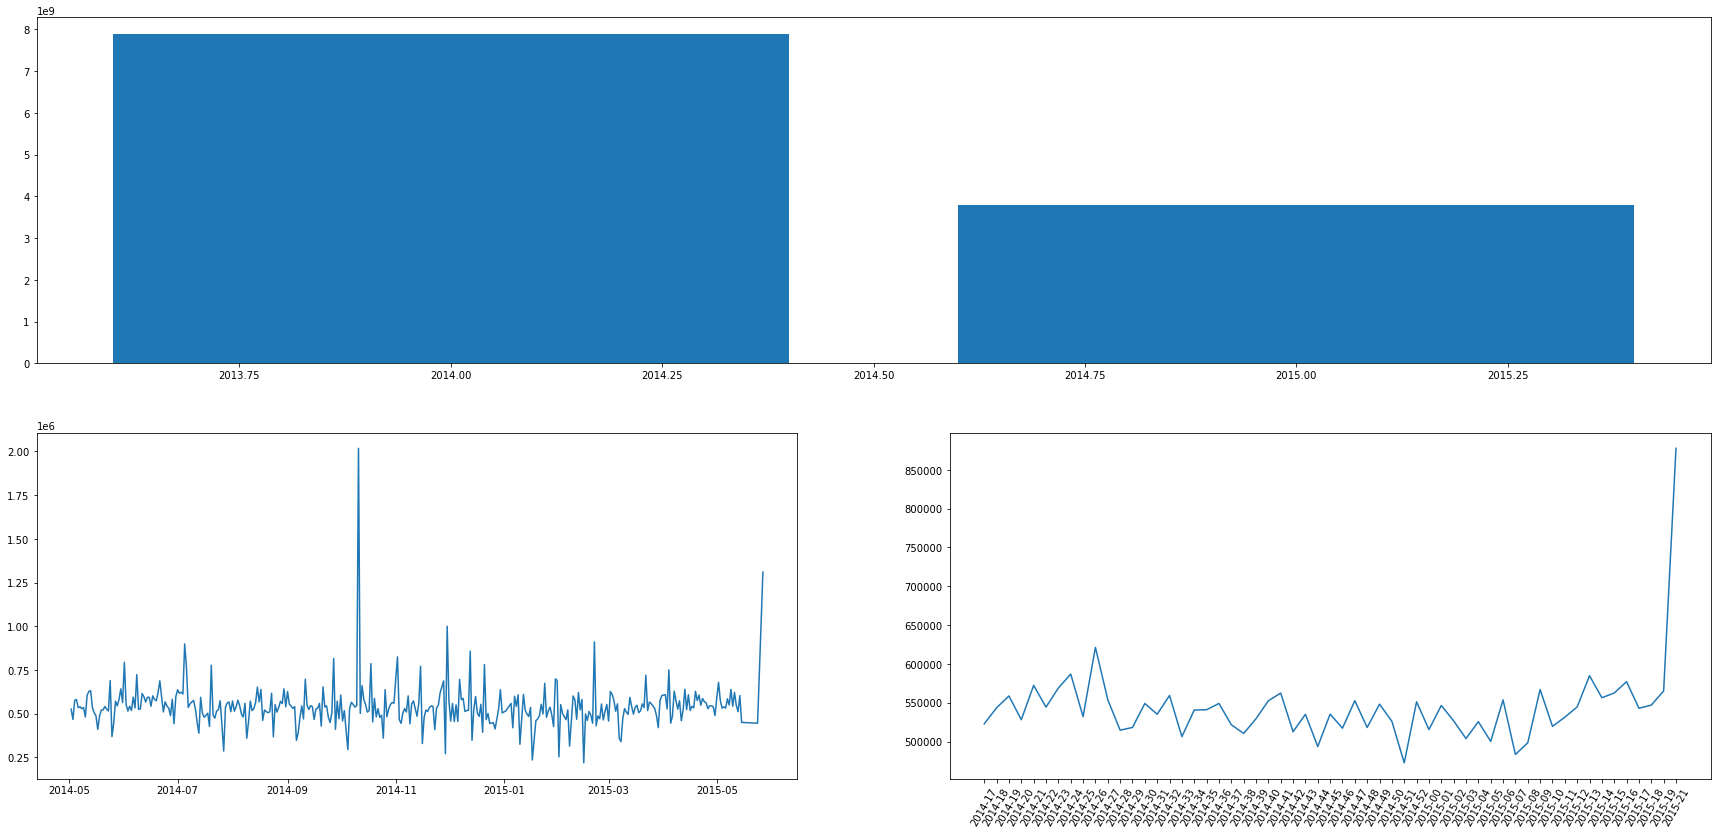

In [61]:
from matplotlib import gridspec

fig = plt.figure (figsize = (30,14) )
specs = gridspec.GridSpec ( ncols=2, nrows=2, figure=fig )

ax1 = fig.add_subplot( specs [0, :]) # First Row
ax2 = fig.add_subplot( specs [1, 0]) # Second Row - First Column
ax3 = fig.add_subplot( specs [1, 1]) # Second Row - Second Column


# first graph
data['year'] = pd.to_datetime(data['date']).dt.year
by_year = data[['price', 'year']].groupby('year').sum().reset_index()
ax1.bar( by_year ['year'], by_year['price'])

# second graph
data['day'] = pd.to_datetime(data['date']).dt.date
by_day = data[['price', 'day']].groupby('day').mean().reset_index()
ax2.plot( by_day ['day'], by_day['price'])

# third graph
data['year_week'] = pd.to_datetime(data['date']).dt.strftime ('%Y-%U')
by_week = data[['price', 'year_week']].groupby('year_week').mean().reset_index()
ax3.plot( by_week ['year_week'], by_week['price'])
plt.xticks (rotation = 60);


In [67]:
# 10. Eu gostaria de olhar no mapa e conseguir identificar as casas com o maior preço

import plotly.express as px

houses = data[['id', 'lat', 'long', 'price']]

fig = px.scatter_mapbox (houses,
                         lat = 'lat',
                         lon = 'long',
                         size = 'price',
                         color_continuous_scale = px.colors.cyclical.IceFire,
                         size_max=15,
                         zoom=8 )
fig.update_layout ( mapbox_style = 'open_street-map' )
fig.update_layout ( height=600, margin={'r': 0, 't': 0, 'l': 0, 'b': 0 })
fig.show()